### Unsupervised Learning--------> Unsupervised learning is a type of Machine Learning that works on unlabeled data without given target its main work to clusterized similar data .

---> There are Two types of Unsupervised Learning.
  1. Clustering
  2. Association Rule

### Clustering ---> Clustering is a technique where we clusetr similar data. There are many algorithm that used in clustering.
  1. K-Means
  2. Hierarchal Clustering
  3. DBSCAN
  4. Mean Shift etc....

### K-Means Algorithm -------> K-means algorithm is used to do clustering on unlabeled dataset.
-> Working of K-Means Algorithm.
   
-> In k-means k stand for how many cluster you build this is a hyperparameter that pass on creating model bydefault it's value is 8(changed version by version). Means is average that i find in several situation.

-> step-1--> select centeroid point randomly from data for each cluster for e.g k=4 so its select 4 centeroid point from data. 

-> step-2--> calculate distance each datapoint to centeroid and min value from the centeroid data goes to that cluster for e.g out of 4 cluster the min distance from 2 cluster than data point goes to that cluster. 
do this for each and every data point or samples and assign cluster to each sample.

-> step-3--> after complete the assignment of each sample or first iteration is complete than in 2nd iteration centeroid of each cluster is updated using the average of previous cluster. for e.g. in first initializationthere are 4 cluster and each cluster contain 10 samples so we find out the average and this average become centeroid of next iteration cluster. this is for all four cluster.

-> step-4--> repeat 2 and 3 step until max-iter is not reached or two centeroid point not same for e.g. max-iter is 50 and iter 30,31 have same centeroid than its stop.

-> step-5--> after complete all iter now 2 initialization (there are a hyperparameter no of initialization means algorithm initialize again with different centeroid from the dataset choose randomly) repeat step 1 
to 4 and then again initialize until no of initialization is not complete for e.g. there are no of initialization is 10 so do all process 10 times.

-> step-6--> after all initialization is complete than our task is to find the best clustering so that task we find the WSSE Score (Within Cluster Sum of Squared Error)  for all initialization last clustering and min wsse of all initialization is our best cluster.

-> step-7--> wsse calculate using euclidean formula without sqrt for e.g there are 10 initialization and 4 cluster so we calculate 1 cluster squared error now find distance between sample and centeroid and sum all 10 error than find sum of squared error for 2,3,4 cluster and add all so its become wsse for 1st initialization do same for all initialization. after calculate wsse for all initialization min wsse is best for e.g min wsse is 4 initialization than 4 initialization clusytering is best clustering.

-> step-7--> how to find the no of cluster so i use a graphical technique elbow technique where we plot a line chart between no.of cluster and  wsse score. and which point elbow form than that point become no of cluster for e.g in 4 elbow form than we decide k=4.

-> step-8--> there are two points in finding k value for e.g. in ine chart where multiple point show elbow form that we consider that point where wsse is slowly less for e.g 1 to 2 wsse is 20000, 2 to 3 5000,3 to 4 wsse is 2000 so we consider 3 because after 3 point wsse slowly less.                                                                                                                                                                                                                                                                     
-> step-9--> in k-means we find the silhouettes score for both complete model and individual sample. silhouettescore calculate for model is average of silhouette score of each sample.

-> step-10--> formula of silhouette score of each individual sample is:-

s(i)=(b(i)-a(i))/max(b(i),a(i))                                                                                                                          

In [17]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.preprocessing import StandardScaler

In [51]:
df=pd.read_csv("G:/dataset/fruits_cluster.csv")
X=df.iloc[:,:].values
sc=StandardScaler()
X_new=sc.fit_transform(X)
model=KMeans(n_clusters=4,n_init=10,max_iter=50)
model.fit(X_new)
model.labels_ # gives samples goes which cluster

array([2, 1, 0, 0, 1, 2, 0, 3, 1, 1, 2, 3, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1])

In [53]:
model.inertia_ # gives WSSE score

4.504043755408113

### how to select number of clusters in KMeans
>elbow technique can be used in select num of clusters
>
>it is a graphical technique where we plot line chart b/w num_of_clustrs & wsse scores

In [56]:
wsse=[]
for i in range(1,10):
    model=KMeans(n_clusters=i,n_init=10,max_iter=50)
    model.fit(X_new)
    wsse.append(model.inertia_)
print(wsse)

[44.00000000000001, 13.889701882404779, 8.92181776283817, 4.504043755408113, 3.078406505620107, 2.1858150667260734, 1.7038595516586263, 1.2728148453532764, 0.9725570692865944]


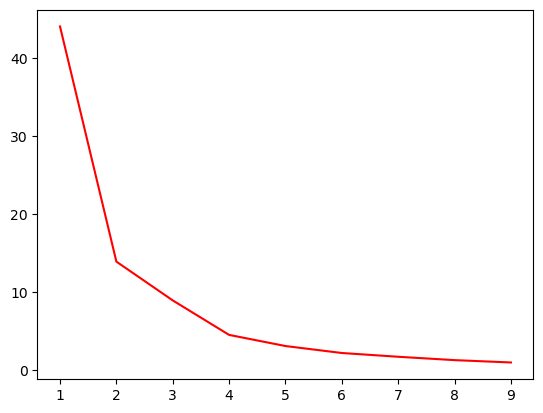

In [58]:
plt.plot(range(1,10),wsse,color='red')
plt.show()

In [60]:
model=KMeans(n_clusters=2,n_init=10,max_iter=50)
model.fit(X_new)
print("Silhouette Score:- ",silhouette_score(X_new,model.labels_))

Silhouette Score:-  0.5825451849684672


In [62]:
model=KMeans(n_clusters=3,n_init=10,max_iter=50)
model.fit(X_new)
print("Silhouette Score:- ",silhouette_score(X_new,model.labels_))

Silhouette Score:-  0.4589342063353845


In [64]:
model=KMeans(n_clusters=4,n_init=10,max_iter=50)
model.fit(X_new)
print("Silhouette Score:- ",silhouette_score(X_new,model.labels_))

Silhouette Score:-  0.5089561431478511


In [68]:
model=KMeans(n_clusters=3,n_init=10,max_iter=50)
model.fit(X_new)
print("Silhouette Score:- ",silhouette_samples(X_new,model.labels_))

Silhouette Score:-  [0.57211511 0.19107365 0.75108913 0.75503664 0.08299885 0.55038756
 0.38874284 0.31515919 0.22519916 0.21212533 0.47462448 0.23329439
 0.56749295 0.5703523  0.76246804 0.65883526 0.40786239 0.52437491
 0.63020314 0.75721628 0.03980724 0.42609371]


In [76]:
model=KMeans(n_clusters=2,n_init=10,max_iter=50)
model.fit(X_new)
print("Silhouette Score:- \n",silhouette_samples(X_new,model.labels_)) 
print("--------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("Model Labels:- \n",model.labels_)

Silhouette Score:- 
 [0.72320101 0.50314304 0.67672313 0.67972618 0.58256766 0.63777434
 0.62299356 0.17525986 0.23503518 0.39962963 0.6417682  0.32641782
 0.70108631 0.71025771 0.70420062 0.59269507 0.68736866 0.611794
 0.6885327  0.71364441 0.51087889 0.69129608]
--------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Model Labels:- 
 [0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0]
